In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
classes = dataset.class_names
print(classes)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [5]:
len(dataset)

68

In [6]:
for batch_img, batch_label in dataset.take(1):
    print(batch_img.shape)
    print(batch_label.numpy())

(32, 256, 256, 3)
[1 0 2 1 0 2 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0]


In [7]:
for batch_img, batch_label in dataset.take(1):
    print(batch_img[0].shape)

(256, 256, 3)


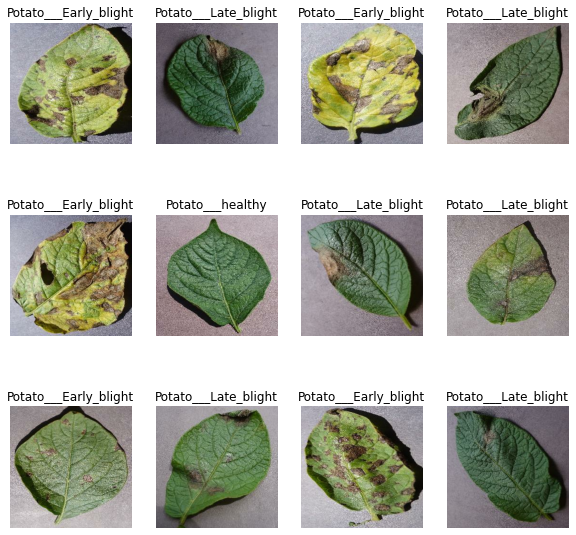

In [8]:
plt.figure(figsize=(10,10))
for batch_img, batch_label in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1)
        plt.imshow(batch_img[i].numpy().astype('uint8'))
        plt.title(classes[batch_label[i]])
        plt.axis("off")

In [9]:
train_ds = dataset.take(54)
test_and_val_ds = dataset.skip(54)
len(train_ds)

54

In [10]:
val_ds = test_and_val_ds.take(6)
len(val_ds)

6

In [11]:
test_ds = test_and_val_ds.skip(6)
len(test_ds)

8

In [12]:
def get_dataset_partition(ds, train_split=0.8, val_split = 0.1, shuffle=True, shuffle_size = 10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    train_ds = ds.take(train_size)
    
    val_size = int(val_split * ds_size)
    val_ds = ds.skip(train_size).take(val_size)
    
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [13]:
train_ds, val_ds, test_ds = get_dataset_partition(dataset)

In [14]:
len(train_ds)

54

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [17]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [18]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(BATCH_SIZE,IMG_SIZE, IMG_SIZE,CHANNEL)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

model.build(input_shape=(BATCH_SIZE,IMG_SIZE, IMG_SIZE,CHANNEL))

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [20]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds)

Epoch 1/50
54/54 [==============================] - 252s 4s/step - loss: 0.9259 - accuracy: 0.4601 - val_loss: 0.9235 - val_accuracy: 0.5521
Epoch 2/50
54/54 [==============================] - 251s 5s/step - loss: 0.6861 - accuracy: 0.7124 - val_loss: 0.5161 - val_accuracy: 0.8125
Epoch 3/50
54/54 [==============================] - 254s 5s/step - loss: 0.3836 - accuracy: 0.8374 - val_loss: 0.3350 - val_accuracy: 0.8854
Epoch 4/50
54/54 [==============================] - 231s 4s/step - loss: 0.2925 - accuracy: 0.8779 - val_loss: 0.1931 - val_accuracy: 0.9271
Epoch 5/50
54/54 [==============================] - 275s 5s/step - loss: 0.2174 - accuracy: 0.9051 - val_loss: 0.1910 - val_accuracy: 0.9219
Epoch 6/50
54/54 [==============================] - 141s 3s/step - loss: 0.2275 - accuracy: 0.9080 - val_loss: 0.1904 - val_accuracy: 0.9323
Epoch 7/50
54/54 [==============================] - 148s 3s/step - loss: 0.2284 - accuracy: 0.9068 - val_loss: 0.2049 - val_accuracy: 0.9219
Epoch 8/50
36

In [ ]:
 scores = model.evaluate(test_ds)

In [ ]:
scores